# **Задание 01: Обучение простой двухслойной нейронной сети с использованием NumPy.**

# А.1 Умножение матриц (распределение ресурсов)

In [7]:
import numpy as np

# 3×2:
Resources_Matrix = np.array([
    [10, 20],
    [15, 25],
    [20, 30]
], dtype=float)

# 2×2:
Allocation_Factors = np.array([
    [1.1, 0.9],
    [0.8, 1.2]
], dtype=float)

# Result: 3×2
Result = Resources_Matrix @ Allocation_Factors

print("Resources_Matrix:\n", Resources_Matrix)
print("\nAllocation_Factors:\n", Allocation_Factors)
print("\nResult (3×2):\n", Result)

Resources_Matrix:
 [[10. 20.]
 [15. 25.]
 [20. 30.]]

Allocation_Factors:
 [[1.1 0.9]
 [0.8 1.2]]

Result (3×2):
 [[27.  33. ]
 [36.5 43.5]
 [46.  54. ]]


# А.2 Поэлементные операции (отслеживание производства)

In [8]:
# Пример данных:
Shift_A_Production = np.array([
    [120, 130, 125, 140, 135, 150, 145],
    [ 90,  95, 100, 105, 110, 115, 120],
    [200, 210, 205, 220, 215, 225, 230]
], dtype=int)

Shift_B_Production = np.array([
    [110, 120, 115, 130, 125, 140, 135],
    [ 85,  90,  95, 100, 105, 110, 115],
    [190, 200, 195, 210, 205, 215, 220]
], dtype=int)

#Total_Production (3×7)
Total_Production = Shift_A_Production + Shift_B_Production

print("Shift A:\n", Shift_A_Production)
print("\nShift B:\n", Shift_B_Production)
print("\nTotal Production (A + B):\n", Total_Production)

Shift A:
 [[120 130 125 140 135 150 145]
 [ 90  95 100 105 110 115 120]
 [200 210 205 220 215 225 230]]

Shift B:
 [[110 120 115 130 125 140 135]
 [ 85  90  95 100 105 110 115]
 [190 200 195 210 205 215 220]]

Total Production (A + B):
 [[230 250 240 270 260 290 280]
 [175 185 195 205 215 225 235]
 [390 410 400 430 420 440 450]]


# A.3 Функция активации (сигмоидная функция в прогнозировании продаж)


In [9]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """Sigmoid activation formula: 1 / (1 + exp(-x))"""
    x = np.asarray(x, dtype=float)
    return 1 / (1 + np.exp(-x))

# Тестовые значения (пример)
test_values = np.array([-3, -1, 0, 1, 3], dtype=float)

# Проверка
sigmoid_values = sigmoid(test_values)

print("Input:", test_values)
print("Sigmoid:", sigmoid_values)

Input: [-3. -1.  0.  1.  3.]
Sigmoid: [0.04742587 0.26894142 0.5        0.73105858 0.95257413]


# A.4 Расчет градиента (корректировка обучения)


In [10]:
# Градиент сигмоиды по входу x: d/dx sigmoid(x) = sigmoid(x) * (1 - sigmoid(x))
def sigmoid_gradient(x: np.ndarray) -> np.ndarray:
    s = sigmoid(x)
    return s * (1 - s)

# Пример
test_values = np.array([-3, -1, 0, 1, 3], dtype=float)

print("x:", test_values)
print("sigmoid(x):", sigmoid(test_values))
print("sigmoid_gradient(x):", sigmoid_gradient(test_values))

x: [-3. -1.  0.  1.  3.]
sigmoid(x): [0.04742587 0.26894142 0.5        0.73105858 0.95257413]
sigmoid_gradient(x): [0.04517666 0.19661193 0.25       0.19661193 0.04517666]


# **C.NumPy**


In [11]:
# 1) Dataset
np.random.seed(42)

X_raw = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
], dtype=float)

y_raw = np.array([
    [18],
    [20],
    [22],
    [25],
    [30]
], dtype=float)


In [24]:
# 2) Normalization

def minmax_fit(a):
    a_min = a.min(axis=0, keepdims=True)
    a_max = a.max(axis=0, keepdims=True)
    return a_min, a_max

def minmax_transform(a, a_min, a_max):
    return (a - a_min) / (a_max - a_min + 1e-12)

def minmax_inverse(a_scaled, a_min, a_max):
    return a_scaled * (a_max - a_min + 1e-12) + a_min

X_min, X_max = minmax_fit(X_raw)
y_min, y_max = minmax_fit(y_raw)

X = minmax_transform(X_raw, X_min, X_max)          # shape (5, 3)
y = minmax_transform(y_raw, y_min, y_max)          # shape (5, 1)
print(X)
print(y)

[[0.25       0.33333333 1.        ]
 [0.         1.         0.66666667]
 [0.75       0.         0.33333333]
 [0.5        0.66666667 0.        ]
 [1.         0.         0.66666667]]
[[0.        ]
 [0.16666667]
 [0.33333333]
 [0.58333333]
 [1.        ]]


In [25]:
# 3) Activations + derivatives
# -------------------------
def relu(z):
    return np.maximum(0.0, z)

def relu_grad(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


In [32]:
# 4) Initialize parameters
W1 = 0.1 * np.random.randn(3, 3)
b1 = np.zeros((1, 3))
W2 = 0.1 * np.random.randn(3, 1)
b2 = np.zeros((1, 1))


print("W1 (3x3):\n", W1)
print("b1 (1x3):\n", b1)
print("W2 (3x1):\n", W2)
print("b2 (1x1):\n", b2)

W1 (3x3):
 [[-0.0035826   0.15646437 -0.26197451]
 [ 0.08219025  0.00870471 -0.02990074]
 [ 0.00917608 -0.19875689 -0.02196719]]
b1 (1x3):
 [[0. 0. 0.]]
W2 (3x1):
 [[ 0.03571126]
 [ 0.1477894 ]
 [-0.05182702]]
b2 (1x1):
 [[0.]]


In [27]:
# 5) Training settings
lr = 0.5
epochs = 5000
loss_history = []

In [28]:
# 6) Training loop: Forward -> Loss -> Backprop -> Gradient Descent
n = X.shape[0]

for epoch in range(1, epochs + 1):
    Z1 = X @ W1 + b1          # (5,3)
    A1 = relu(Z1)             # (5,3)
    Z2 = A1 @ W2 + b2         # (5,1)
    y_hat = sigmoid(Z2)       # (5,1)

    loss = np.mean((y_hat - y) ** 2)
    loss_history.append(loss)

    # dLoss/dy_hat for MSE: (2/n)*(y_hat - y)
    dY = (2.0 / n) * (y_hat - y)                 # (5,1)

    # sigmoid derivative: y_hat*(1-y_hat)
    dZ2 = dY * (y_hat * (1.0 - y_hat))           # (5,1)

    dW2 = A1.T @ dZ2                              # (3,1)
    db2 = np.sum(dZ2, axis=0, keepdims=True)      # (1,1)

    dA1 = dZ2 @ W2.T                              # (5,3)
    dZ1 = dA1 * relu_grad(Z1)                     # (5,3)

    dW1 = X.T @ dZ1                               # (3,3)
    db1 = np.sum(dZ1, axis=0, keepdims=True)      # (1,3)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

In [29]:
# 7) Final predictions

Z1 = X @ W1 + b1
A1 = relu(Z1)
Z2 = A1 @ W2 + b2
y_hat_scaled = sigmoid(Z2)
y_hat_revenue = minmax_inverse(y_hat_scaled, y_min, y_max)


In [35]:
# 8) Print results required by assignment

print("Final trained weights and biases")
print("W1 (3x3):\n", W1)
print("b1 (1x3):\n", b1)
print("W2 (3x1):\n", W2)
print("b2 (1x1):\n", b2)

print("\nPredictions for all 5 data points")
for i in range(n):
    print(f"Sample {i+1}: y_true = {y_raw[i,0]:.2f} ($k), "
          f"y_pred = {y_hat_revenue[i,0]:.2f} ($k)")

print("\nTraining loss (MSE on scaled y)")
print("First 5:", [float(v) for v in loss_history[:5]])
print("Last  5:", [float(v) for v in loss_history[-5:]])
print("Final loss:", float(loss_history[-1]))

Final trained weights and biases
W1 (3x3):
 [[-0.0035826   0.15646437 -0.26197451]
 [ 0.08219025  0.00870471 -0.02990074]
 [ 0.00917608 -0.19875689 -0.02196719]]
b1 (1x3):
 [[0. 0. 0.]]
W2 (3x1):
 [[ 0.03571126]
 [ 0.1477894 ]
 [-0.05182702]]
b2 (1x1):
 [[0.]]

Predictions for all 5 data points
Sample 1: y_true = 18.00 ($k), y_pred = 18.47 ($k)
Sample 2: y_true = 20.00 ($k), y_pred = 19.87 ($k)
Sample 3: y_true = 22.00 ($k), y_pred = 21.95 ($k)
Sample 4: y_true = 25.00 ($k), y_pred = 25.05 ($k)
Sample 5: y_true = 30.00 ($k), y_pred = 29.51 ($k)

Training loss (MSE on scaled y)
First 5: [0.129126217776015, 0.1282696765566282, 0.12752075726109555, 0.12686595664520395, 0.12629107415765065]
Last  5: [0.0006690557142952559, 0.0006657917175493483, 0.0006655877160888874, 0.0006684368532989418, 0.0006651610353132059]
Final loss: 0.0006651610353132059


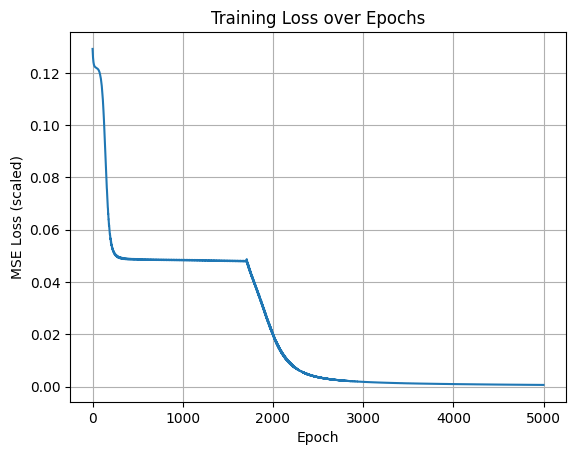

In [36]:
# 9) Simple loss plot

import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (scaled)")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()
